# Assignment \# II:  Bias-variance tradeoff

## Problem statement

Let's suppose that we have a single test set $T$ and training sets, $D_j$ ($j=1, \dots, N)$, where $N$(=100) is a number of training sets. We denote by $(x^i_j, y^i_j)$ training samples in each set $D_j$, where $i=1,\dots, M$ and $M(=50)$ is the number of samples. We denote by $(x^i, y^i)$ test samples, where $i=1,\dots, K$, and $K(=100)$ is the number of samples.

Assume that training and test sets are obtained(sampled) from a true function $f_{\text{true}}$, for the purpose of simulating the bias-variance tradeoff only. Specifically, the training sample $y^i_j$ is obtained by adding noise to the true function $f_{\text{true}}$ as follows: $y^i_j = f_{\text{true}}(x^i_j) + \epsilon $, where $\epsilon$ is the Gaussian noise with mean 0 and variance 1. The test sample $y^i$ is directly sampled from the true function $f_{\text{true}}$ without degradation, in order to discard the influence of noise, as follows: $y^i = f_{\text{true}}(x^i)$.



Let's suppose that we use polynomial regression for prediction. We denote by $f_{j}^k$ a set of functions (models) for each dataset $D_j$, obtained with the degree of polynomial functions, $k$ (i.e., model complexity). For individual polynomial models $f_{j}^k$, we will finally calculate expectations of mean-squared-error (MSE) on test samples, over different training sets $D_j$, that is, compute expected prediction error using test samples, as follows:

\begin{equation}
E_{D}[(f_{true}(x) - f_{D}(x))^2].
\end{equation}


**Note**:
You can use ```average```, ```transpose```, ```dot``` operators, ```concatenate```, ```min``` and ```max``` provided by ```Numpy```. For this week, you can also use ```sklearn.linear_model.LinearRegression``` and ```sklearn.preprocessing.PolynomialFeatures``` . You will get no credit otherwise. 
    

### P1. Assessing performance (60 points)

Let's simulate effect of model complexity on the performance (e.g., training and test errors).

P1.1 Write the ```mse``` function which returns MSE between targets (observations) and predictions (*5 points*).  

P1.2 Write the ```bias``` function which returns average squared bias of predictions. (*10 points*).  

P1.3 Write the ```variance``` function which returns average variance of predictions. (*10 points*).  

P1.4 Write the ```assessing_performance``` function using the following code structure (*35 points*).


For each **degree of polynomial functions** $k$:
> For each **training set $D_j (j=1, \dots, N)$**: 
>>* Estimate the model $f_{j}^k$ using the ```regression``` function.
>>* Calculate MSEs for the training and test sets, and store them to lists respectively. Use the ```predict``` and ```mse``` functions. 
>
>* For each polynomial degree, store all predictions of a set of functions $f_{j}^k$ on test samples to a dictonary with the degree as a key.
>* For each polynomial degree, calculate the average MSEs for traning and test sets using a set of functions $f_{j}^k$, and store them to dictionaries using the degree as a key, separately. Note that the average MSE for the test set is the expected prediction error.
>* For each polynomial degree, calculate the average squared bias of predictions, and store it to a dictionary using the degree as a key. Use the ```bias``` function.
>* For each polynomial degree, calculate the average variance of predictions, and store it to a dictionary using the degree as a key. Use the ```variance``` function.

Return 5 dictionaries

### P2. Visualization (20 points)

P2.1 Plot the average MSEs for training and test sets, and average squared bias and variance w.r.t the degree of polynomial. Write the ```plot_comparison``` function (*10  points*)   

P2.2 For each degree of polynomal function, plot predictions for the models $f_j^k$ on the test set and their average. Also plot the true function $f_{\text{true}}$ for comparison. Write the ```plot_models``` function. (*10 points*) 
> **Plot configuration**
> * Scatter plots of predictions &rarr; ```alpha=0.2, color='silver'```
> * Scatter plots of average predictions &rarr; ```color='lightsalmon'```
> * Line plot of true model &rarr; ```color='red', linewidth=3.0```
  
  



## Results

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from BiasVarianceTradeoff import *

import pandas as pd

### Prepare datasets

In [4]:
f_true = lambda x : (x-1)**3 
x_range = 3

X_train_set, y_train_set, X_test, y_test = prepare_data(f_true, x_range)

### Visualizing The Dataset

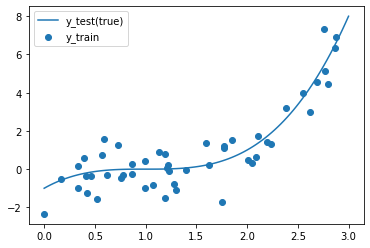

In [5]:
plt.scatter(X_train_set[-1], y_train_set[-1], label='y_train')
plt.plot(X_test, y_test, label='y_test(true)')
plt.legend()

### P1

In [6]:
models = ["Deg. 0", "Deg. 1", "Deg. 2", "Deg. 3", "Deg. 5", "Deg. 7", "Deg. 9"]

In [7]:
y_pred_comparison, train_mse_comparison, test_mse_comparison, bias_comparison, variance_comparison = assessing_performance(X_train_set, y_train_set, X_test, y_test, models)

### P2

Plot the predictions of functions $f_{N}^k$ by varying the degree of polynomial.

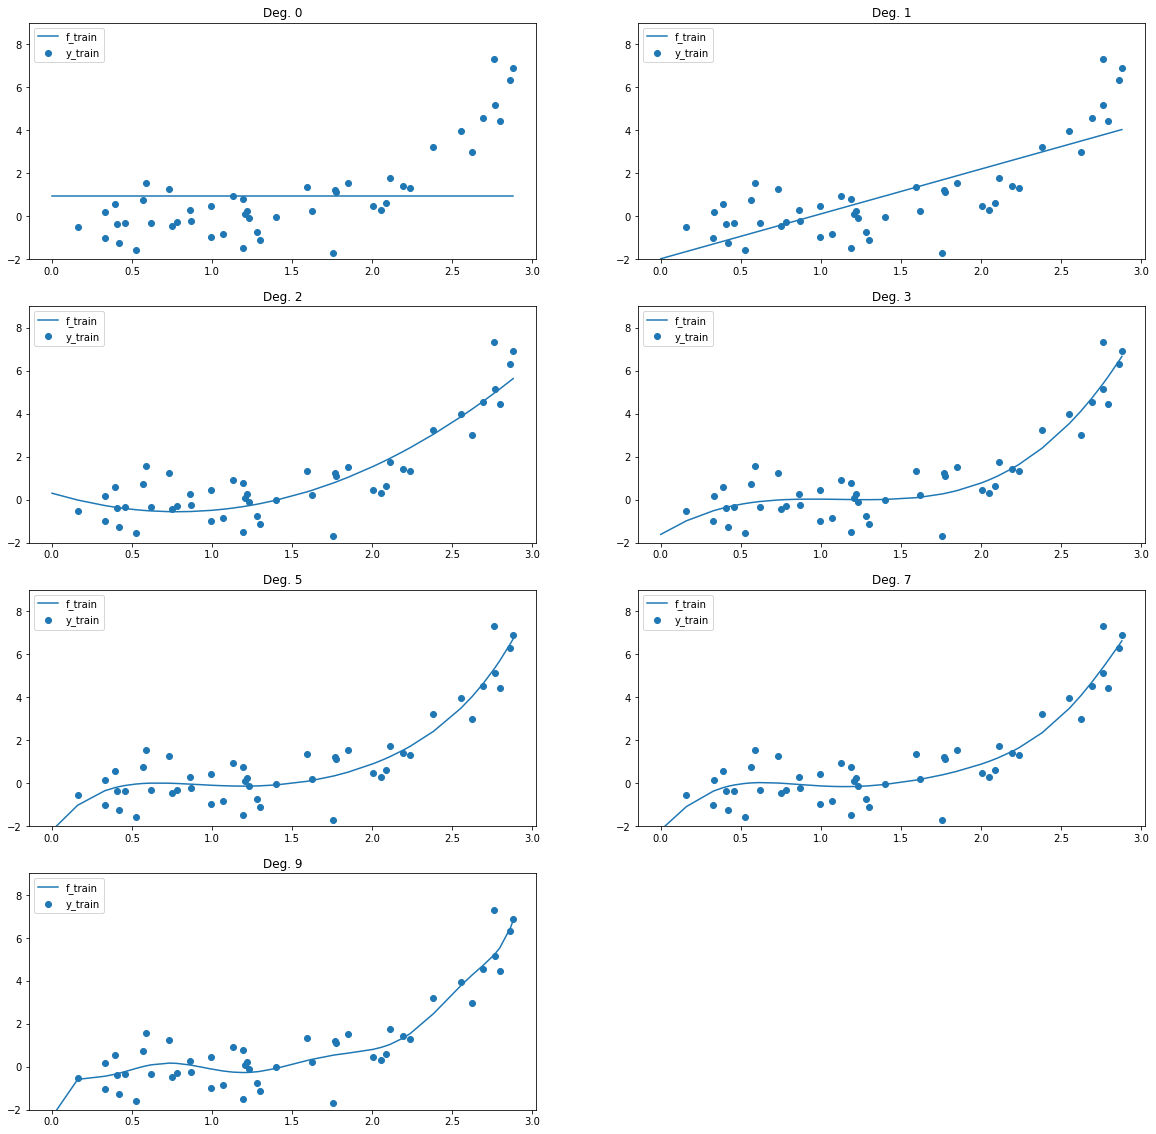

In [8]:
num_model = len(models)
fig = plt.figure(figsize=(20,20))
X_train = X_train_set[-1]
y_train = y_train_set[-1]
for i in range(num_model):
    degree = int(models[i].split()[1])
    L = regression(X_train, y_train, degree)
    y_pred = predict(X_train, L, degree)
    
    plt.subplot((num_model + 1)//2, 2, i+1)
    plt.scatter(X_train_set[-1], y_train_set[-1], label='y_train')
    plt.plot(X_train_set[-1], y_pred, label='f_train')
    plt.ylim(-2, 9)
    plt.legend()
    plt.title(models[i])

### P2.1

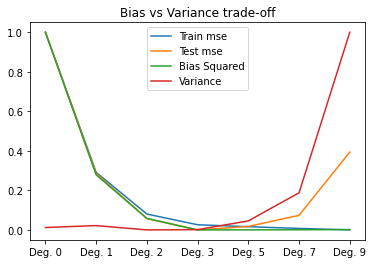

In [9]:
plot_comparison(train_mse_comparison, test_mse_comparison, bias_comparison, variance_comparison)

In [10]:
categories=['Train mse', 'Test mse', 'Bias squared', 'Variance']
make_table(categories, train_mse_comparison, test_mse_comparison, bias_comparison, variance_comparison)

,Train mse,Test mse,Bias squared,Variance
Deg. 0,5.562503,4.911613,4.791710,0.119903
Deg. 1,2.209799,1.473882,1.335414,0.138468
Deg. 2,1.211446,0.377035,0.279951,0.097085
Deg. 3,0.955068,0.101014,0.001191,0.099822
Deg. 5,0.908583,0.185761,0.002638,0.183124
Deg. 7,0.867516,0.455790,0.004305,0.451485
Deg. 9,0.831693,1.994603,0.010512,1.984091


### P2.2

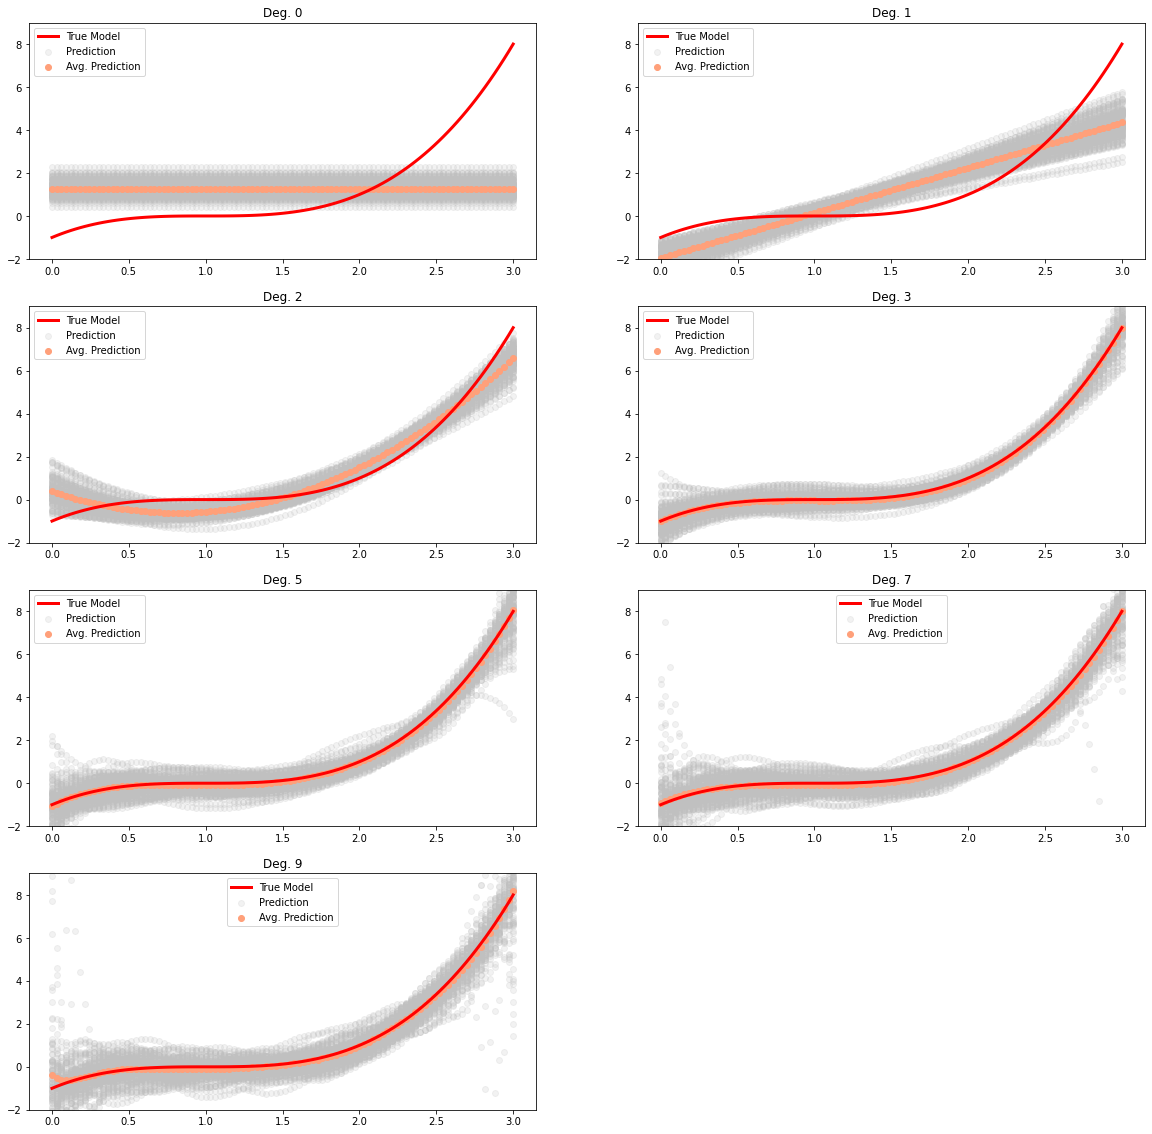

In [11]:
plot_models(models, X_test, y_test, y_pred_comparison)

Plot the error beteween predictions of a set of functions $f_j^k$ and true values. 

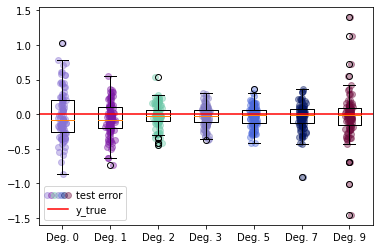

In [12]:
plot_box_prediction_error(models, X_test, y_test, y_pred_comparison)


## Analysis and discussion (20 points)

Your answer must include.....

- Analysis of results from P1 and P2.
- Analysis of bias and variance according to model complexity.
    

For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).

### Analysis about Model Complexity

We can compare the Mean Squared Error of predictions from each model. The below graph shows how Train MSE and Test MSE differs by model complexity.

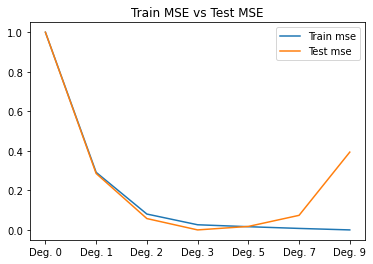

In [13]:
 x = train_mse_comparison.keys()
train_mse = normalize(list(train_mse_comparison.values()))
test_mse = normalize(list(test_mse_comparison.values()))
### CODE HERE ###
plt.plot(x, train_mse, label = "Train mse")
plt.plot(x, test_mse, label = "Test mse")
plt.title('Train MSE vs Test MSE')
plt.legend()
plt.show()

First, we can see that train mse continuously decreases as complexity increases. This is because complex models can fit more to the given training data. If there is enough complexity, the model can even go right through each data points in training data. As a result, complex models give accurate predictions for given training data.
<p> Test MSE also decreases as complexity increases when degrees models are smaller than 3. However, test MSE increases when models have higher degrees that 3. This is the result of over-fitting problem. Models with high complexities can fit very well to the given training data. However, training data is not perfect - they have noise. When models have too high complexities, they fit too well to training data that they fit even to noises of training data. As a result, they cannot give accurate prediction results for test data.</p>
<p> Therefore, it is our goal to find the best degree(=complexity) of the model that can neither underfit(too low degree) nor overfit(too high degree). In this case, it is degree 3.</p>

### Bias and Variance

Test MSE of Deg. 1: 1.4738817669120132
Test MSE of Deg. 9: 1.994602528147153


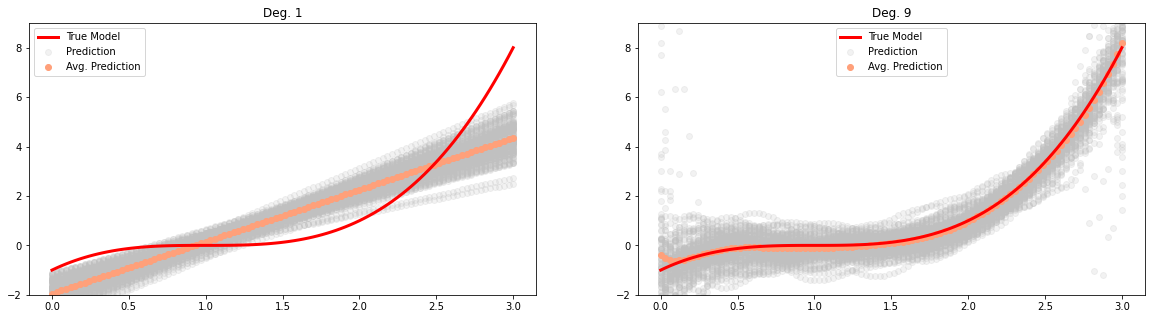

In [14]:
print(f"Test MSE of Deg. 1: {test_mse_comparison['Deg. 1']}")
print(f"Test MSE of Deg. 9: {test_mse_comparison['Deg. 9']}")

num_model = len(models)
fig = plt.figure(figsize=(20,5))
for i in [1, 6]:
    degree = int(models[i].split()[1])

    plt.subplot(1, 2, 1+i//6)
    X_test_rep = np.repeat(X_test, len(y_pred_comparison[models[i]]))
    y_pred_flatten = y_pred_comparison[models[i]].flatten()
    plt.scatter(X_test_rep, y_pred_flatten, alpha=0.2, color='silver', label='Prediction')
    
    average_pred = np.mean(y_pred_comparison[models[i]], axis=1)
    plt.scatter(X_test, average_pred, color='lightsalmon', label='Avg. Prediction')
    plt.plot(X_test, y_test, color='red', linewidth=3.0, label="True Model")
    plt.ylim(-2, 9)
    plt.legend()
    plt.title(models[i])

Two models above with diffrent degrees - Deg. 1 and Deb 9 - show similar test MSE results. However, we can see that their errors seem to be coming from different reasons. In the figure for Deg. 1, we can see that the predictions(grey points) are close to each other near their average(orange). However, the orange line does not follow the true model(red). On the other hand, the predictions is figure of Deg. 9 are spread out from their average compared to Deg. 1. However, the average of the widely spread predictions shows high similarity to the average prediction.
<p> From this result, we can see the two errors - Bias and Variance. </p>
<p> Bias is equal to $$ Bias(x) = f_{w}(x) - f_{w(true)}(x) $$. This error comes from low complexity. Because of the low complexity of the model, the model cannot represent the true model no matter how much data is given. Therefore, the average of predictions - orange line - still shows big difference from the true model in deg 1.</p>
<p> Variance of the model is the variance of predictions between models. In the graph of Deg 9, we can see that predictions are widely spread around from their average. This is what happens when there's a big variance. When model complexity is high, the model fluctuates alot depending on the given training data. As a result, each model gives different predictions, spreading out the predictions from the average. However, we can see that the orange line is much closer to the true data. The model has enough complexity to draw an accurate line for the true model - but has too much complexity(or not enough training data for the model) in this situation.</p>

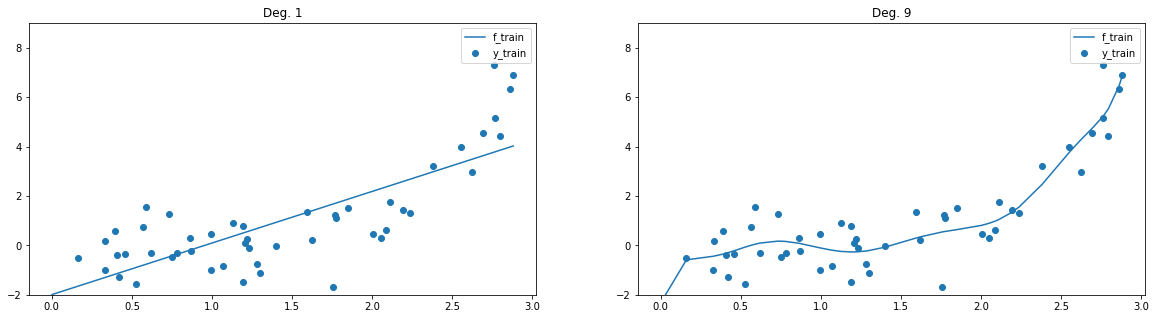

In [15]:
num_model = len(models)
fig = plt.figure(figsize=(20,5))
X_train = X_train_set[-1]
y_train = y_train_set[-1]
for i in [1, 6]:
    degree = int(models[i].split()[1])
    L = regression(X_train, y_train, degree)
    y_pred = predict(X_train, L, degree)
    
    plt.subplot(1, 2, 1+i//6)
    plt.scatter(X_train_set[-1], y_train_set[-1], label='y_train')
    plt.plot(X_train_set[-1], y_pred, label='f_train')
    plt.ylim(-2, 9)
    plt.legend()
    plt.title(models[i])

The two models show the results of high bias and high variance is directly. The first figure - Deg 1 - does not have enough curves (or freedom) for the line to smoothly cover the data. On the other hand, the second figure - Deg 9 - has too many curves (or freedom) that they care too much on individual points. The first one has high bias, and the second has high variance.

### Bias Variance Tradeoff

Now we can see how variance and bias differs as complexity increases.

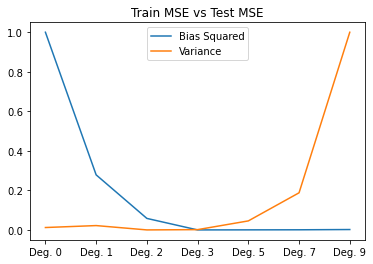

In [16]:
x = train_mse_comparison.keys()
bias = normalize(list(bias_comparison.values()))
variance = normalize(list(variance_comparison.values()))
### CODE HERE ###
plt.plot(x, bias, label = "Bias Squared")
plt.plot(x, variance, label = "Variance")
plt.title('Train MSE vs Test MSE')
plt.legend()
plt.show()

As we noticed aobve, low degree models have high bias. And bias squared decreases as model complexity increases. On the other hand, variance is small is low degree models. And it increases as complexity increases.
<p> This tells us that big error in low degree models are mostly from bias, and error in high degree models are from variance.</p>


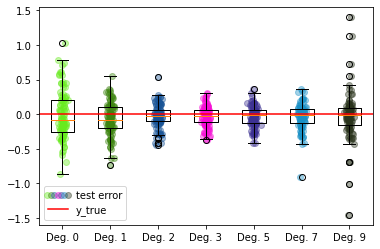

In [17]:
plot_box_prediction_error(models, X_test, y_test, y_pred_comparison)

<p> The above graph shows the distribution of test errors. Again, high test errors in low degree models are from bias. And high test errors in high degree models are from variance. </p>
<p> The lower degree area is called 'Underfitted' and high degree area is called 'Overfitted'. </p>
<p> Therefore, we need to find the best degree - degree 3 - which has both <u>low variance and low bias</u> </p>